In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from function import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [14]:
df = pd.read_csv('data/train_set.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [15]:
label = pd.read_csv('data/lables.csv')
label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [16]:
df2 = pd.merge(df, label, on='id')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [17]:
df2.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [31]:
df2.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [32]:
train = df2[['amount_tsh','longitude','latitude','region','population','extraction_type','extraction_type_class',
            'payment','water_quality','quality_group','quantity_group','source','source_type','waterpoint_type',
            'status_group']]
train.head()

,amount_tsh,longitude,latitude,region,population,extraction_type,extraction_type_class,payment,water_quality,quality_group,quantity_group,source,source_type,waterpoint_type,status_group
0,6000.0,34.938093,-9.856322,Iringa,109,gravity,gravity,pay annually,soft,good,enough,spring,spring,communal standpipe,functional
1,0.0,34.698766,-2.147466,Mara,280,gravity,gravity,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,communal standpipe,functional
2,25.0,37.460664,-3.821329,Manyara,250,gravity,gravity,pay per bucket,soft,good,enough,dam,dam,communal standpipe multiple,functional
3,0.0,38.486161,-11.155298,Mtwara,58,submersible,submersible,never pay,soft,good,dry,machine dbh,borehole,communal standpipe multiple,non functional
4,0.0,31.130847,-1.825359,Kagera,0,gravity,gravity,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,communal standpipe,functional


In [33]:
train.isna().sum()

amount_tsh               0
longitude                0
latitude                 0
region                   0
population               0
extraction_type          0
extraction_type_class    0
payment                  0
water_quality            0
quality_group            0
quantity_group           0
source                   0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

In [34]:
train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [35]:
train['status_group'] = train['status_group'].map({'functional': 0, 'non functional': 1,
                                                   'functional needs repair': 2})
train.head()

<ipython-input-35-bc840713ecd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['status_group'] = train['status_group'].map({'functional': 0, 'non functional': 1,


,amount_tsh,longitude,latitude,region,population,extraction_type,extraction_type_class,payment,water_quality,quality_group,quantity_group,source,source_type,waterpoint_type,status_group
0,6000.0,34.938093,-9.856322,Iringa,109,gravity,gravity,pay annually,soft,good,enough,spring,spring,communal standpipe,0
1,0.0,34.698766,-2.147466,Mara,280,gravity,gravity,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,communal standpipe,0
2,25.0,37.460664,-3.821329,Manyara,250,gravity,gravity,pay per bucket,soft,good,enough,dam,dam,communal standpipe multiple,0
3,0.0,38.486161,-11.155298,Mtwara,58,submersible,submersible,never pay,soft,good,dry,machine dbh,borehole,communal standpipe multiple,1
4,0.0,31.130847,-1.825359,Kagera,0,gravity,gravity,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,communal standpipe,0


In [36]:
X = train.drop(columns=['status_group'], axis=1)
y = train['status_group']

In [38]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,amount_tsh,longitude,latitude,population,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,34.938093,-9.856322,109,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0.0,34.698766,-2.147466,280,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,25.0,37.460664,-3.821329,250,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,38.486161,-11.155298,58,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,31.130847,-1.825359,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
def class_model(model, X_train, X_test, y_train, y_test):
    #do something to normalize/scale data here
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    print('Confusion Matrix Train:')
    plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.Blues)
    plt.show()
    
    print('Confusion Matrix Test:')
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    
    return model

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6457
           1       0.77      0.75      0.76      4572
           2       0.36      0.38      0.37       851

    accuracy                           0.75     11880
   macro avg       0.64      0.64      0.64     11880
weighted avg       0.75      0.75      0.75     11880

Confusion Matrix Train:


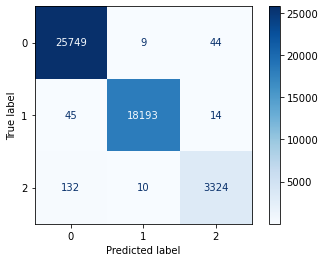

Confusion Matrix Test:


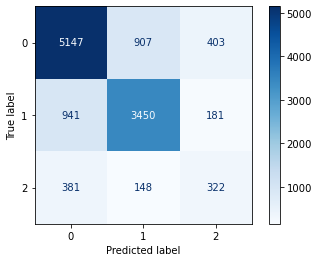

DecisionTreeClassifier()

In [54]:
d_tree = DecisionTreeClassifier(criterion='gini')
class_model(d_tree, X_train, X_test, y_train, y_test)